In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
drillholes = pd.read_csv(r"C:\Users\12369\OneDrive\Desktop\mahdi\github\2\drill_holes.csv")
samples = pd.read_csv(r"C:\Users\12369\OneDrive\Desktop\mahdi\github\2\sample_intervals.csv")
assays = pd.read_csv(r"C:\Users\12369\OneDrive\Desktop\mahdi\github\2\assay_results.csv")

In [4]:
drillholes.info()
samples.info()
assays.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   hole_id        200000 non-null  int64  
 1   project_id     200000 non-null  int64  
 2   country        180050 non-null  object 
 3   latitude       200000 non-null  float64
 4   longitude      200000 non-null  float64
 5   total_depth_m  200000 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 9.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   sample_id     1200000 non-null  int64  
 1   hole_id       1200000 non-null  int64  
 2   from_depth_m  1200000 non-null  float64
 3   to_depth_m    1200000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 36.6 MB
<class 'pandas.core.frame.DataFrame

In [6]:
drillholes.head()

,hole_id,project_id,country,latitude,longitude,total_depth_m
0,1,1127,Canada,16.680098,107.603586,215.111207
1,2,861,Chile,8.971756,-114.892321,1294.444065
2,3,1131,USA,57.312725,35.260178,1194.290611
3,4,1096,USA,23.241027,-21.678348,455.457542
4,5,1045,Chile,37.052523,56.583106,1022.707910


In [7]:
drillholes_clean = drillholes[
    (drillholes["total_depth_m"] > 0)
].drop_duplicates(subset="hole_id")

In [9]:
samples.head()

,sample_id,hole_id,from_depth_m,to_depth_m
0,1,85927,356.781177,371.193078
1,2,38376,1152.848084,1176.328865
2,3,24519,1237.172806,1270.979953
3,4,147041,505.556208,544.842403
4,5,155571,1239.622080,1239.892469


In [11]:
samples_clean = samples[
    samples["from_depth_m"] < samples["to_depth_m"]
]

samples_clean = samples_clean[
    samples_clean["hole_id"].isin(drillholes_clean["hole_id"])
]


In [13]:
assays.head()

,assay_id,sample_id,element,grade_ppm
0,1,164,Cu,6.409346
1,2,512880,Au,6.902875
2,3,232726,Ag,9.822392
3,4,665805,Pb,-10.013954
4,5,683379,Au,9.286636


In [12]:
assays_clean = assays[
    assays["grade_ppm"] >= 0
]

assays_clean = assays_clean[
    assays_clean["sample_id"].isin(samples_clean["sample_id"])
]


In [14]:
drillholes_clean.to_csv(r"C:\Users\12369\OneDrive\Desktop\mahdi\github\2\drill_holes_clean.csv", index=False)
samples_clean.to_csv(r"C:\Users\12369\OneDrive\Desktop\mahdi\github\2\sample_intervals_clean.csv", index=False)
assays_clean.to_csv(r"C:\Users\12369\OneDrive\Desktop\mahdi\github\2\assay_results_clean.csv", index=False)


In [16]:
drillholes = pd.read_csv(r"C:\Users\12369\OneDrive\Desktop\mahdi\github\2\drill_holes_clean.csv")
samples = pd.read_csv(r"C:\Users\12369\OneDrive\Desktop\mahdi\github\2\sample_intervals_clean.csv")
assays = pd.read_csv(r"C:\Users\12369\OneDrive\Desktop\mahdi\github\2\assay_results_clean.csv")

In [17]:
holes_per_project = drillholes.groupby("project_id")["hole_id"].count()


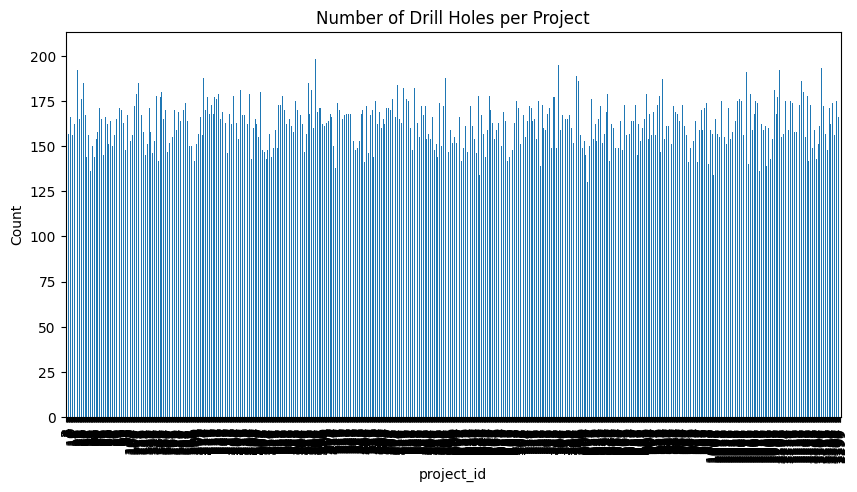

In [31]:
holes_per_project.plot(kind="bar", figsize=(10,5))
plt.title("Number of Drill Holes per Project")
plt.ylabel("Count")
plt.show()


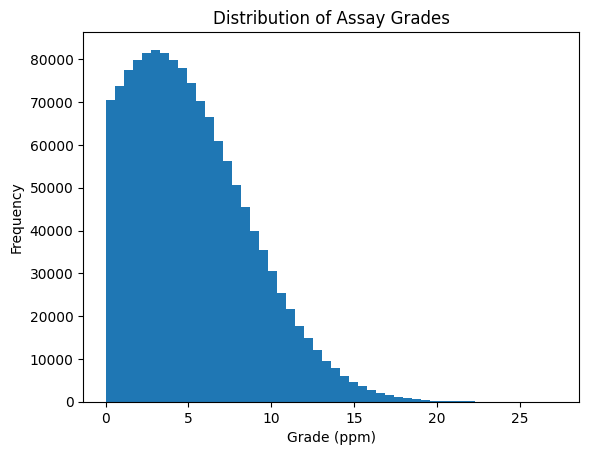

In [19]:
plt.hist(assays["grade_ppm"], bins=50)
plt.title("Distribution of Assay Grades")
plt.xlabel("Grade (ppm)")
plt.ylabel("Frequency")
plt.show()


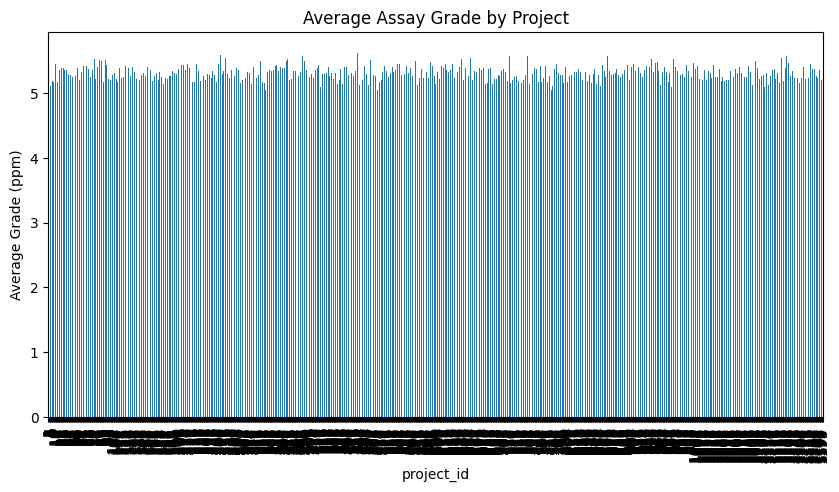

In [20]:
merged = assays.merge(samples, on="sample_id").merge(drillholes, on="hole_id")

avg_grade = merged.groupby("project_id")["grade_ppm"].mean()

avg_grade.plot(kind="bar", figsize=(10,5))
plt.title("Average Assay Grade by Project")
plt.ylabel("Average Grade (ppm)")
plt.show()


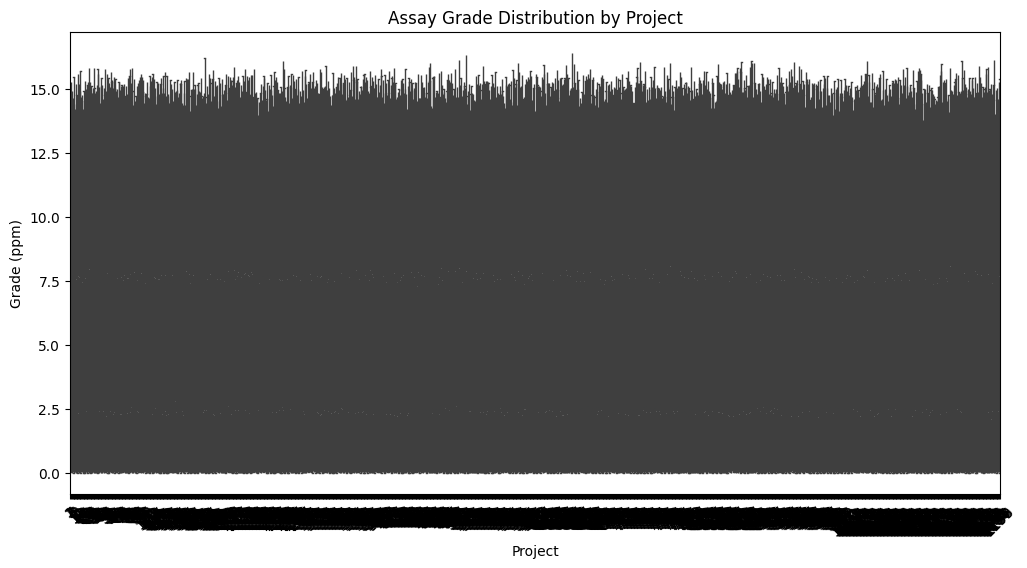

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(
    data=merged,
    x="project_id",
    y="grade_ppm",
    showfliers=False
)
plt.title("Assay Grade Distribution by Project")
plt.ylabel("Grade (ppm)")
plt.xlabel("Project")
plt.xticks(rotation=45)
plt.show()


In [22]:
quality_metrics = merged.groupby("project_id").agg(
    avg_grade=("grade_ppm", "mean"),
    sample_count=("sample_id", "count"),
    hole_count=("hole_id", "nunique")
)
